In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
colnames=['Industrial Risk',
'Management Risk',
'Financial Flexibility',
'Credibility',
'Competitiveness',
'Operating Risk',
'Class']

bank_df = pd.read_csv('R5_External_USL_Qualitative_Bankruptcy.data.txt',names=colnames)
bank_df.dtypes

Industrial Risk          object
Management Risk          object
Financial Flexibility    object
Credibility              object
Competitiveness          object
Operating Risk           object
Class                    object
dtype: object

In [3]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
Industrial Risk          250 non-null object
Management Risk          250 non-null object
Financial Flexibility    250 non-null object
Credibility              250 non-null object
Competitiveness          250 non-null object
Operating Risk           250 non-null object
Class                    250 non-null object
dtypes: object(7)
memory usage: 13.8+ KB


In [4]:
bank_df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [5]:
bank_df.describe()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
count,250,250,250,250,250,250,250
unique,3,3,3,3,3,3,2
top,N,N,N,N,N,N,NB
freq,89,119,119,94,103,114,143


In [6]:
print(bank_df[bank_df['Management Risk'] == 'A'].count())
print(bank_df[bank_df['Industrial Risk'] == 'A'].count())
print(bank_df[bank_df['Financial Flexibility'] == 'A'].count())
print(bank_df[bank_df['Credibility'] == 'A'].count())
print(bank_df[bank_df['Competitiveness'] == 'A'].count())
print(bank_df[bank_df['Operating Risk'] == 'A'].count())

Industrial Risk          69
Management Risk          69
Financial Flexibility    69
Credibility              69
Competitiveness          69
Operating Risk           69
Class                    69
dtype: int64
Industrial Risk          81
Management Risk          81
Financial Flexibility    81
Credibility              81
Competitiveness          81
Operating Risk           81
Class                    81
dtype: int64
Industrial Risk          74
Management Risk          74
Financial Flexibility    74
Credibility              74
Competitiveness          74
Operating Risk           74
Class                    74
dtype: int64
Industrial Risk          77
Management Risk          77
Financial Flexibility    77
Credibility              77
Competitiveness          77
Operating Risk           77
Class                    77
dtype: int64
Industrial Risk          56
Management Risk          56
Financial Flexibility    56
Credibility              56
Competitiveness          56
Operating Risk          

In [7]:
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder


categorical_feature_mask = bank_df.dtypes==object
categorical_cols = bank_df.columns[categorical_feature_mask].tolist()
print(categorical_cols)

## Applying the LabelEncoding
le = LabelEncoder()
bank_df[categorical_cols] = bank_df[categorical_cols].apply(lambda col: le.fit_transform(col))
bank_df.head(10)

['Industrial Risk', 'Management Risk', 'Financial Flexibility', 'Credibility', 'Competitiveness', 'Operating Risk', 'Class']


,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,2,2,0,0,0,2,1
1,1,1,0,0,0,1,1
2,0,0,0,0,0,0,1
3,2,2,2,2,2,2,1
4,1,1,2,2,2,1,1
5,0,0,2,2,2,0,1
6,2,2,0,2,2,2,1
7,2,2,2,0,0,2,1
8,2,2,0,2,0,2,1
9,2,2,0,0,2,2,1


In [8]:
bank_df.groupby('Class').Class.count()

Class
0    107
1    143
Name: Class, dtype: int64

In [9]:
bank_df.dtypes

Industrial Risk          int64
Management Risk          int64
Financial Flexibility    int64
Credibility              int64
Competitiveness          int64
Operating Risk           int64
Class                    int64
dtype: object

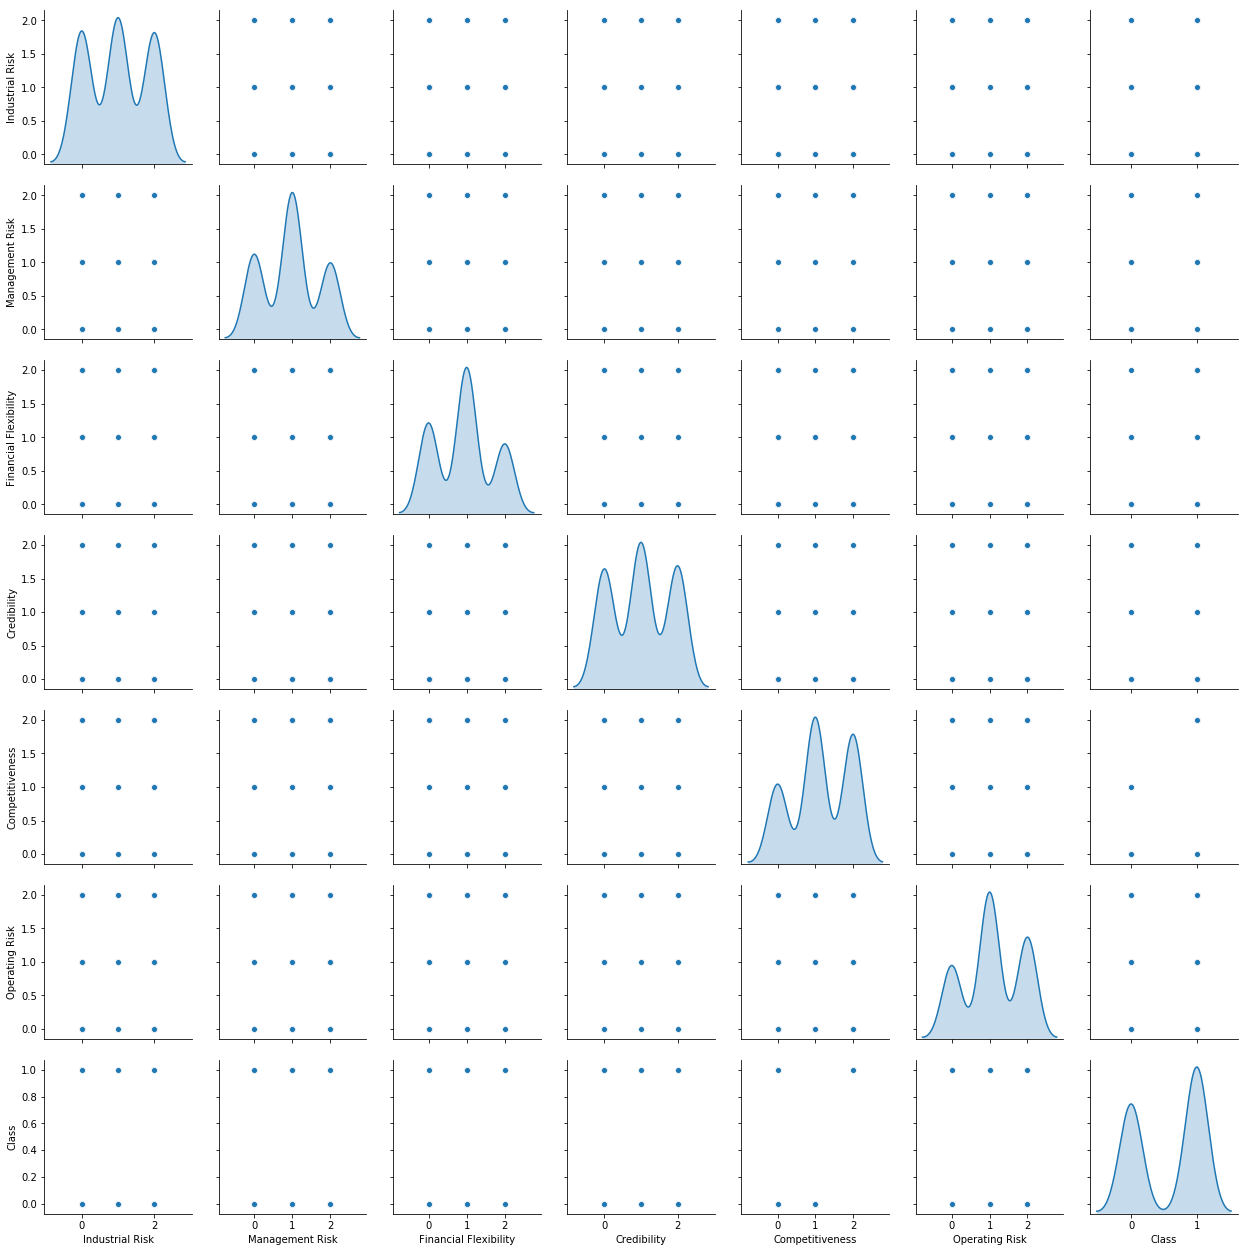

In [10]:
import seaborn as sns
sns.pairplot(bank_df, diag_kind='kde')

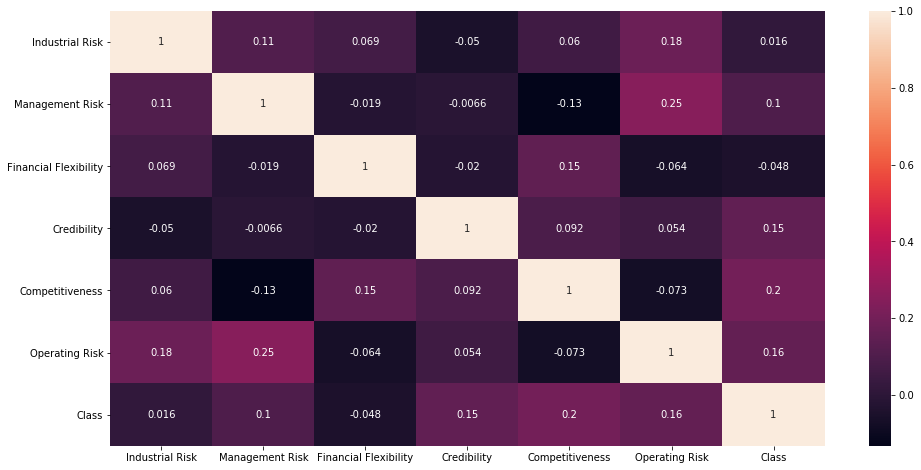

In [11]:
plt.figure(figsize=(16,8))
sns.heatmap(bank_df.corr(),annot=True)

In [12]:
bank_df.corr()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
Industrial Risk,1.000000,0.110063,0.068694,-0.050432,0.060428,0.177573,0.015836
Management Risk,0.110063,1.000000,-0.018999,-0.006609,-0.132174,0.253851,0.100632
Financial Flexibility,0.068694,-0.018999,1.000000,-0.020124,0.150036,-0.064455,-0.047966
Credibility,-0.050432,-0.006609,-0.020124,1.000000,0.092155,0.054104,0.152045
Competitiveness,0.060428,-0.132174,0.150036,0.092155,1.000000,-0.073031,0.203521
Operating Risk,0.177573,0.253851,-0.064455,0.054104,-0.073031,1.000000,0.159147
Class,0.015836,0.100632,-0.047966,0.152045,0.203521,0.159147,1.000000


## EDA / Summary of the Dataset

1. There are 249 records  6 are independent and 1 is dependent , so total 7 features
2. There are no missing values, same is also given in the problem statement. Also revalidated using isNAN , isSum
3. Each of the 6 independent features have one of the 3 possible values  
    P=Positive,A-Average,N-negative
3. Independent variable are category in nature , dependent column are binary in nature
4. Applied LabelEncoding 
5. Heatmap and using corr function A,A1,A2 are -ve correct corelated with target column

# Separate the dependant variable from the rest of the train data 2 point

In [13]:
X=bank_df.drop('Class',axis=1)
y=bank_df['Class']

# Split the dataset into training and test data ( Take 80:20 ratio).

In [14]:
# splitting data into training and test set for independent attributes

from sklearn.model_selection import train_test_split
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.20, random_state=1)

# Apply PCA on the independent features of train data.

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca=PCA() # initialize PCA
pca.fit(X_train) # fit PCA on Train data

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
pca.explained_variance_ratio_

array([0.2362834 , 0.20852356, 0.18644056, 0.13697505, 0.12639758,
       0.10537985])

In [17]:
pca.explained_variance_ratio_.sum()

0.9999999999999999

# Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance)

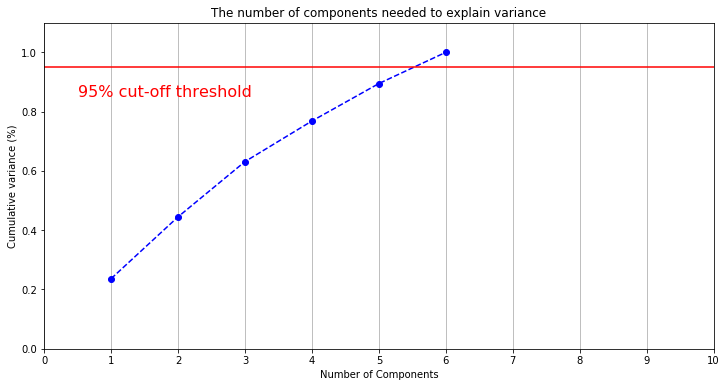

In [18]:
#% matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
xi = np.arange(1, 7, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [19]:
var_cum=np.zeros(X_train.columns.size) # array to hold cumulaite variance
var_cum=np.zeros(X_train.columns.size)
for i,v in enumerate(pca.explained_variance_/pca.explained_variance_.sum()*100):
    if i==0:
        var_cum[i]=v
    else:
        var_cum[i]=v+var_cum[i-1]
       

Text(0.5, 1.0, 'Elbow plot for Variance explained')

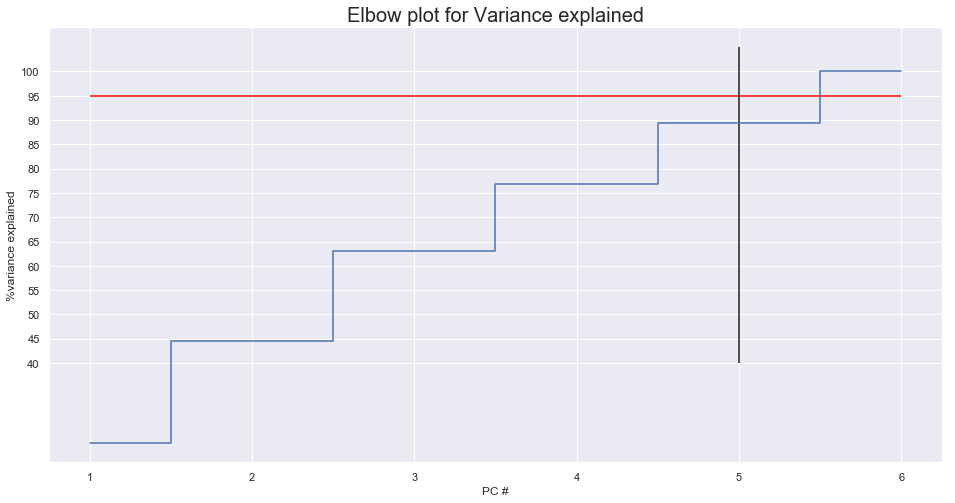

In [20]:
sns.set()
plt.figure(figsize=(16,8))
plt.step(x=np.arange(1,var_cum.size+1),y=var_cum, where= 'mid')
plt.yticks(np.arange(40,105,5))
plt.hlines(95,xmin=1,xmax=6,colors='red')
plt.vlines(5,ymin=40,ymax=105)
plt.xlabel('PC #')
plt.ylabel('%variance explained')
plt.title('Elbow plot for Variance explained',fontsize=20)

# Transform the data Using PCA using optimum number of components

In [21]:
pca=PCA(n_components=5) # reinitialize PCA with 5 components as per the above graph suggests

In [22]:
X_tf_train=pca.fit_transform(X_train)
X_tf_train

array([[-9.15930247e-01,  5.54895481e-01,  2.26071246e-01,
        -7.70842560e-02,  6.92345398e-02],
       [-1.38197874e-01, -1.00121346e-01,  5.34553253e-01,
        -4.33351906e-01, -1.24505417e+00],
       [-5.83266775e-01, -1.34962063e+00,  6.31071917e-01,
        -5.60092634e-01,  1.06185916e-02],
       [-5.73906537e-01,  5.77348169e-01, -9.98403024e-01,
        -6.89914120e-02,  1.22281271e-01],
       [ 1.28296591e-01,  6.49811279e-01,  6.38708916e-01,
        -7.47302959e-01, -4.64674652e-01],
       [ 1.42708405e+00, -3.73604812e-01, -8.90593489e-01,
         6.36142699e-01, -1.45781684e+00],
       [ 1.70364315e+00, -9.12400582e-01,  5.35893932e-01,
        -8.97603898e-01,  1.21707036e+00],
       [ 4.46766910e-01, -2.06978368e+00,  2.85214344e-01,
        -3.22407392e-01,  2.40867818e-02],
       [-1.25063058e-01,  2.99100339e-01, -7.51054751e-01,
         7.33566809e-01, -1.20433044e+00],
       [-1.67721016e+00,  9.71805490e-01, -6.11516014e-01,
         8.30990919e-01

In [23]:
X_train_5D=pd.DataFrame(X_tf_train,columns=['pc1','pc2','pc3','pc4','pc5']) # data frame with Transformed features
X_train_5D.head()

,pc1,pc2,pc3,pc4,pc5
0,-0.915930,0.554895,0.226071,-0.077084,0.069235
1,-0.138198,-0.100121,0.534553,-0.433352,-1.245054
2,-0.583267,-1.349621,0.631072,-0.560093,0.010619
3,-0.573907,0.577348,-0.998403,-0.068991,0.122281
4,0.128297,0.649811,0.638709,-0.747303,-0.464675


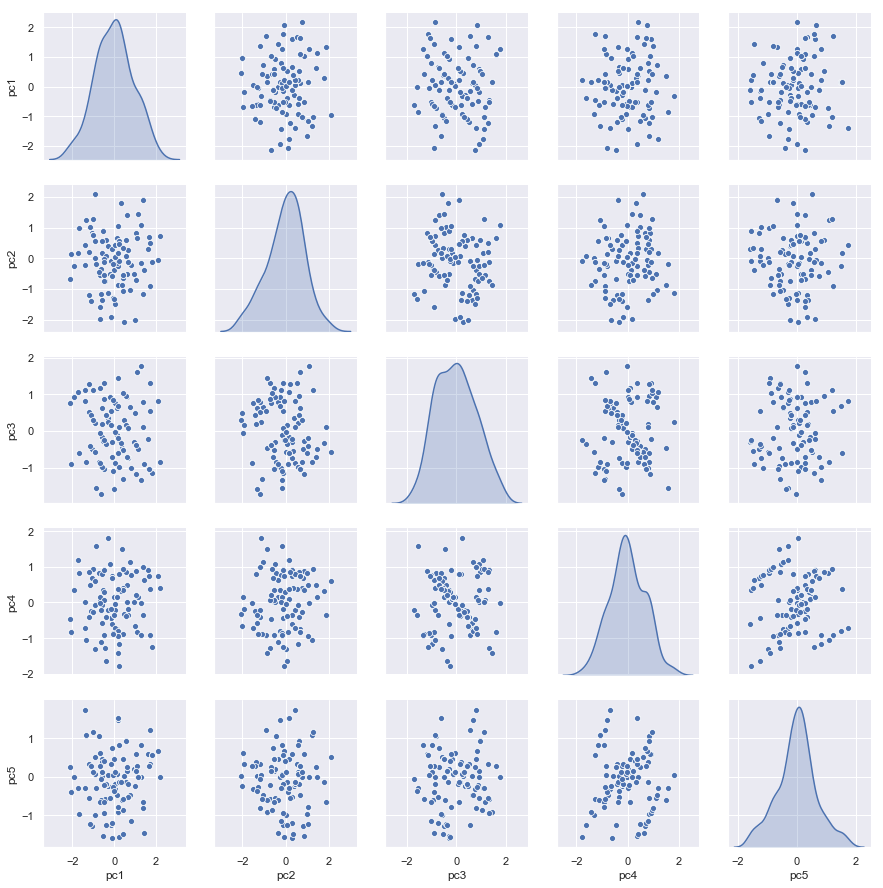

In [24]:
sns.pairplot(X_train_5D,diag_kind='kde')

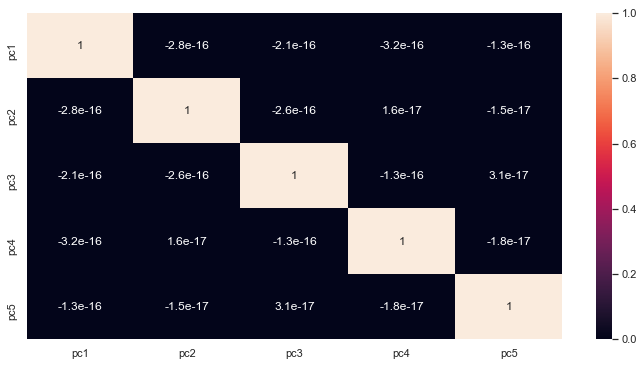

In [25]:
sns.heatmap(X_train_5D.corr(),annot=True)

# Summary after applying PCA 
1. Based on the pair plot it can be infered that there can be 2-3 clusters
2. First 5 components explained the 95% of the variance

# Apply KMeans algorithm on the above transformed data

In [26]:
from sklearn.cluster import KMeans

# Let us check optimal number of clusters-
cluster_range = range( 1, 10)   # expect 3 to 5 clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 100,init='k-means++',random_state=0)
  clusters.fit(X_train_5D)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,614.407229
1,2,508.737165
2,3,436.216037
3,4,382.486951
4,5,342.052480
5,6,317.836268
6,7,290.435304
7,8,268.035762
8,9,247.908472


Text(0.5, 1.0, 'Elbow plot')

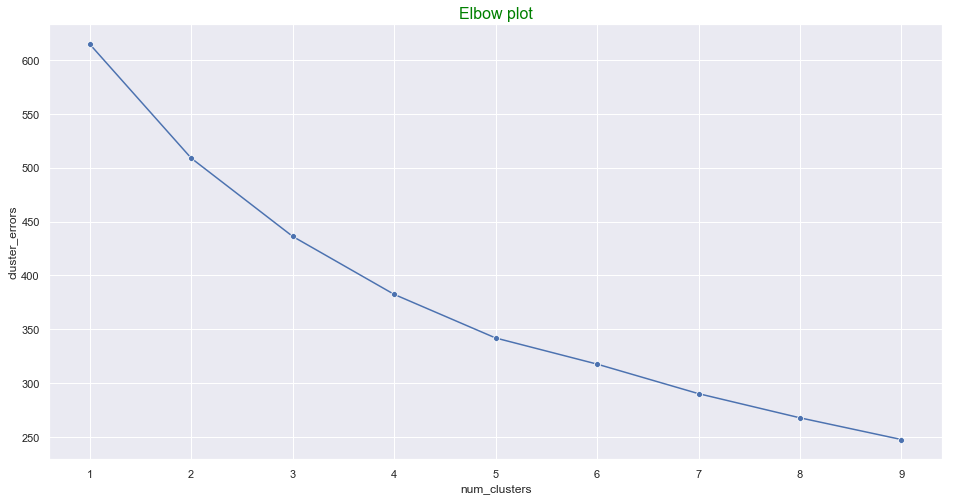

In [27]:
plt.figure(figsize=(16,8))
sns.lineplot(x='num_clusters',y='cluster_errors',data=clusters_df,marker='o')
plt.title('Elbow plot',fontsize=16,color='green')

## Select optimal number of clusters and form clusters out of the train data.

# Create a new column in the train data and populate it with the cluster labels

In [28]:
# Number of clusters
kmeans = KMeans(n_clusters=3,n_init = 100,init='k-means++',random_state=0)
# Fitting the input data
kmeans = kmeans.fit(X_train_5D)
# Getting the cluster labels
labels = kmeans.predict(X_train_5D)
# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print("Centroid values")
print("sklearn")
print(centroids) # From sci-kit learn

Centroid values
sklearn
[[ 0.61542349  0.42579093 -0.09705559 -0.07452185 -0.05826801]
 [-0.96550534  0.40494846  0.04052145  0.05667502  0.03261843]
 [ 0.12017844 -1.04627289  0.09867241  0.04885636  0.05051121]]


In [29]:
X_train_5D['Labels']=labels
X_train_5D.head()

,pc1,pc2,pc3,pc4,pc5,Labels
0,-0.915930,0.554895,0.226071,-0.077084,0.069235,1
1,-0.138198,-0.100121,0.534553,-0.433352,-1.245054,0
2,-0.583267,-1.349621,0.631072,-0.560093,0.010619,2
3,-0.573907,0.577348,-0.998403,-0.068991,0.122281,1
4,0.128297,0.649811,0.638709,-0.747303,-0.464675,0


In [30]:
X_train_5D.Labels.unique()

array([1, 0, 2])

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


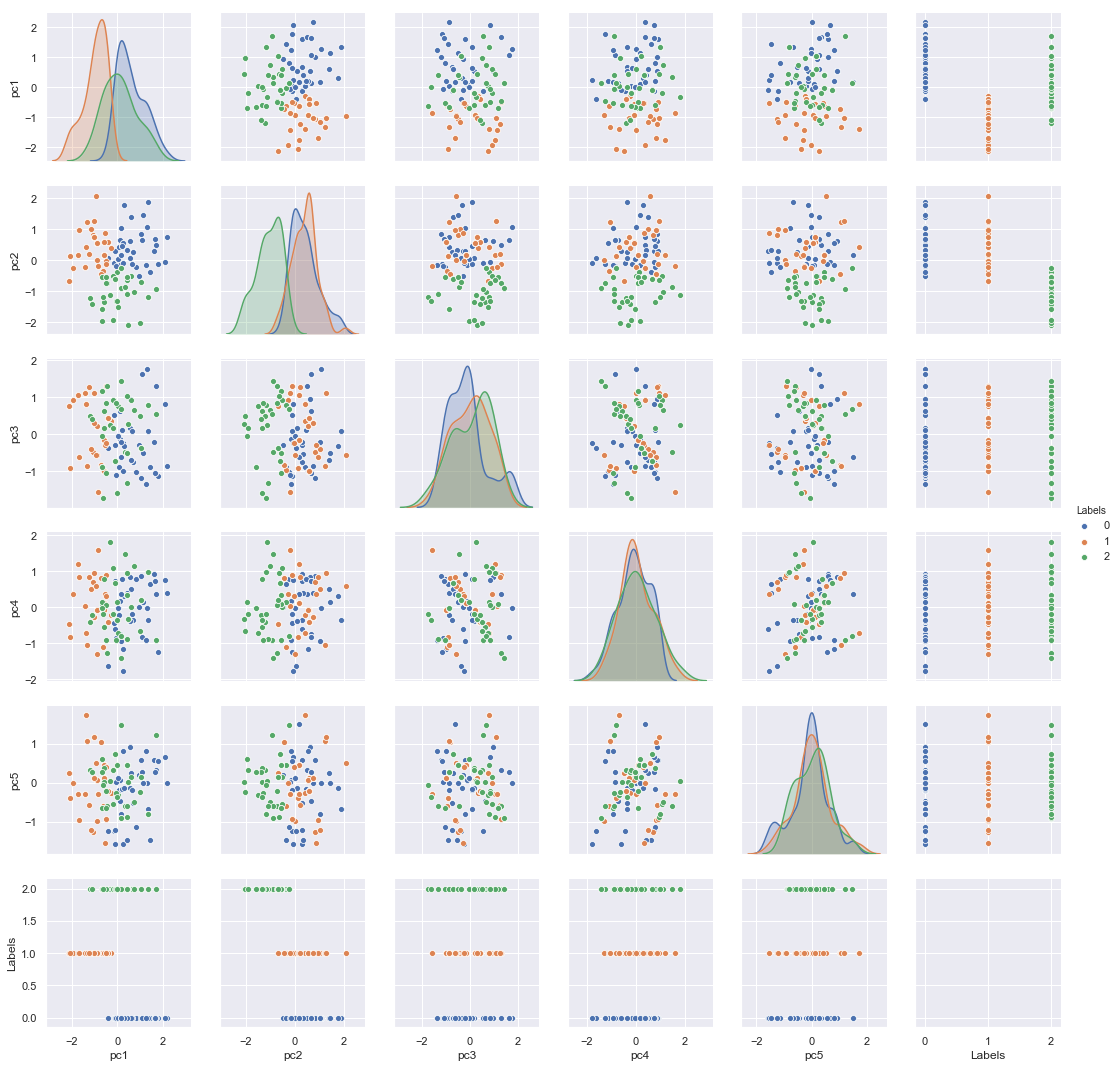

In [31]:
sns.pairplot(data=X_train_5D,diag_kind='kde',hue='Labels')

# Transform the test data using the same PCA object that was fit on the train data. 

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler() 
data_rescaled_test = scaler.fit_transform(X_test)
data_rescaled_test
reduced_test = pca.transform(data_rescaled_test)
reduced_test

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[-0.68790751,  0.66824766, -1.06995753,  0.60737526,  0.09091456],
       [-0.38890824,  1.12062847, -0.5886653 ,  0.47882135,  1.01018732],
       [-0.40707538,  1.36577099,  0.03577683, -0.0781996 ,  0.02220974],
       [-0.66813209,  1.34204204, -0.06738259,  0.08935508,  0.15568704],
       [-0.3156724 ,  0.40647145, -0.09894478,  1.12551938,  0.12079017],
       [-0.52215547,  0.74566216, -0.64074313,  0.63579687,  0.61999756],
       [-0.71668827,  0.67565349,  0.14553852,  0.33031009,  0.14542279],
       [-0.72567213,  1.03198762, -0.40564257,  0.44635331,  0.45458095],
       [-0.46461542,  1.05571657, -0.30248315,  0.27879864,  0.32110365],
       [-0.76285706,  0.36605503,  0.03195833,  0.01540557,  0.25985637],
       [-0.77611561,  1.12947264, -0.36465493,  0.34939958,  0.47978617],
       [-0.26109876,  0.76939111, -0.53758371,  0.4682422 ,  0.48652026],
       [ 0.57382243,  1.00889195,  0.12955444,  0.67036645,  0.58380466],
       [-0.48255409,  0.85564978,  0.1

In [33]:
cov_matrix_test = np.cov(data_rescaled_test.T)
print('Covariance Matrix \n%s', cov_matrix_test)

Covariance Matrix 
%s [[ 0.16010204  0.04265306  0.01153061 -0.02132653  0.00428571  0.01581633]
 [ 0.04265306  0.14244898  0.02408163 -0.02530612 -0.00265306  0.00612245]
 [ 0.01153061  0.02408163  0.12255102 -0.035       0.01367347 -0.01173469]
 [-0.02132653 -0.02530612 -0.035       0.15806122  0.00387755  0.00969388]
 [ 0.00428571 -0.00265306  0.01367347  0.00387755  0.13836735  0.00918367]
 [ 0.01581633  0.00612245 -0.01173469  0.00969388  0.00918367  0.11479592]]


In [34]:
eigenvalues_test, eigenvectors_test = np.linalg.eig(cov_matrix_test)
print('Eigen Vectors \n%s', eigenvectors_test)
print('\n Eigen Values \n%s', eigenvalues_test)

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs_test = [(eigenvalues_test[index], eigenvectors_test[:,index]) for index in range(len(eigenvalues_test))]
# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs_test.sort()

eig_pairs_test.reverse()
print(eig_pairs_test)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted_test = [eig_pairs_test[index][0] for index in range(len(eigenvalues_test))]
eigvectors_sorted_test = [eig_pairs_test[index][1] for index in range(len(eigenvalues_test))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted_test)

tot_test = sum(eigenvalues_test)
var_explained_test = [(i / tot_test) for i in sorted(eigenvalues_test, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 18 entries as there are 18 eigen vectors)
cum_var_exp_test = np.cumsum(var_explained_test)  # an array of cumulative variance. There will be 18 entries with 18 th entry 
# cumulative reaching almost 100%

# P_reduce represents reduced mathematical space....
P_reduce_test = np.array(eigvectors_sorted_test[0:10])   # Reducing from 18 to 10 dimension space

X_std_test = np.dot(data_rescaled_test,P_reduce_test.T)   # projecting original data into principal component dimensions

data_df_test = pd.DataFrame(X_std_test)  # converting array to dataframe for pairplot


Eigen Vectors 
%s [[-0.55951128 -0.54032305 -0.12736827  0.10289647  0.23910275 -0.55768956]
 [-0.52933812 -0.17738317 -0.1499129  -0.36312637 -0.60410932  0.41116135]
 [-0.35610956  0.33386159  0.3110937   0.73997335 -0.33947419 -0.0462584 ]
 [ 0.52641353 -0.56658705  0.00736357  0.23777204 -0.56024813 -0.17720095]
 [-0.04502389 -0.17569663  0.92714933 -0.32375762  0.02456908 -0.04555235]
 [-0.02821167 -0.46177101  0.06974271  0.38553398  0.38491229  0.69592649]]

 Eigen Values 
%s [0.22900108 0.15952734 0.14351716 0.08899407 0.1118378  0.10344909]
[(0.22900108268172867, array([-0.55951128, -0.52933812, -0.35610956,  0.52641353, -0.04502389,
       -0.02821167])), (0.1595273425529977, array([-0.54032305, -0.17738317,  0.33386159, -0.56658705, -0.17569663,
       -0.46177101])), (0.1435171550668678, array([-0.12736827, -0.1499129 ,  0.3110937 ,  0.00736357,  0.92714933,
        0.06974271])), (0.11183779536877943, array([ 0.23910275, -0.60410932, -0.33947419, -0.56024813,  0.02456908,


# Apply SVC model on train dataset and predict target for test dataset.

In [35]:
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [36]:

svc=SVC()
X_train_scaled=scaler.fit_transform(X_train) 
X_test_scaled=scaler.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [37]:
svc.fit(X_train_scaled,train_labels)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [38]:
y_test_predict=svc.predict(X_test_scaled)
y_test_predict

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

# Check accuracy and confusion matrix

In [39]:
print ('Test accuracy score :',accuracy_score(test_labels,y_test_predict))

Test accuracy score : 0.98


Text(0.5, 1.0, 'Confusion matrix of Test data')

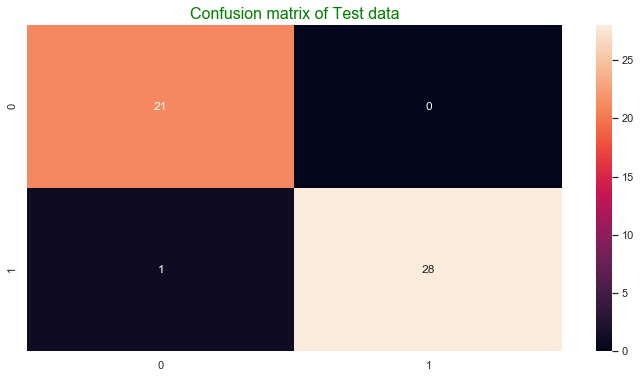

In [40]:
sns.heatmap(confusion_matrix(test_labels,y_test_predict),annot=True)
plt.title('Confusion matrix of Test data',fontsize=16,color='green')

In [41]:
confusion_matrix(test_labels,y_test_predict)

array([[21,  0],
       [ 1, 28]])